<h1><b><center> Model Development</center></b></h1>

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mpl

In [77]:
df=pd.read_csv('autos_updated_4.13.23.csv', index_col=0)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body=style,drive-wheels,engine-location,wheel-base,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned
0,3,122,alfa-romero,0,0,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,Low
1,3,122,alfa-romero,0,0,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,Low
2,1,122,alfa-romero,0,0,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium
3,2,164,audi,0,0,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,Low
4,2,164,audi,0,0,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,Low


In [78]:
from sklearn.linear_model import LinearRegression

## **Simple Linear Regression**

In [79]:
#create Linear Regression object using constructor
lm=LinearRegression()

X=df[['highway-mpg']] #Predictor variable
Y=df[['price']] #Target variable

lm.fit(X,Y) #Fit the model

LinearRegression()

In [80]:
Yhat=lm.predict(X)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

This outputs an array with the same number of samples as X

In [81]:
#View intercept and slope
intercept=lm.intercept_
slope=lm.coef_
print('The intercept is:', float(intercept), 'The slope is:', float(slope) )


The intercept is: 38423.305858157386 The slope is: -821.7333783219252


**What is the equation of the predicted line?**

Price= 38423.31-821.73 * highway-mpg

## **Regression Plots**

(0.0, 48169.05265173428)

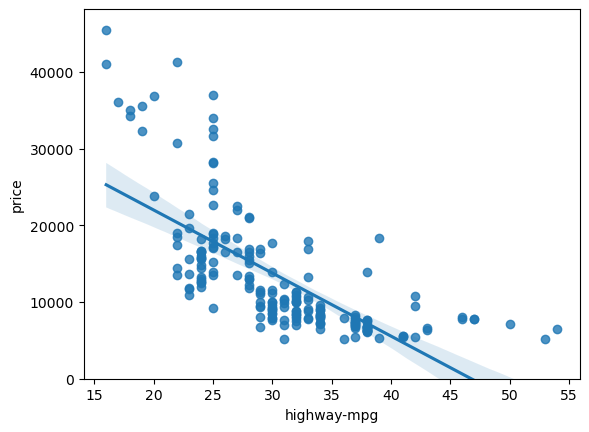

In [120]:
sns.regplot(x='highway-mpg', y='price', data=df)
mpl.ylim(0,) #Sets bottom of y-axis to 0

**Run a correlation analysis to quantify results**

In [104]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


## **Residual Plots**

Shows the residuals (errors) in a linear regression model.

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

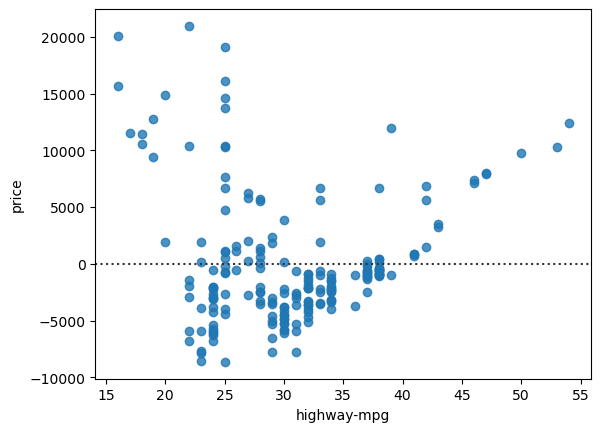

In [87]:
sns.residplot(x=df['highway-mpg'], y=df['price'])

**Is this an appropriate fit for our data?**

Probably not! We can see that the data is biased (forming a curve) and the residuals are not randomly spread around the x-axis, therefore a nonlinear model may be better for this dataset.

## **Multiple Linear Regression**

In [82]:
Z=df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [105]:
lm.fit(Z, df['price'])
Yhat2=lm.predict(Z)
Yhat2[0:5]

array([13698.95609311, 13698.95609311, 19056.78572196, 10621.59764327,
       15519.32197778])

In [106]:
#Find the intercept
lm.intercept_

-15831.930960299469

In [107]:
#Find the coefficients
lm.coef_

array([53.66247317,  4.70938694, 81.44600167, 36.55016267])

The Linear Function is:
<p>Price = -15831.93 + 53.66 x horsepower + 4.71 x curb-weight + 81.45 x engine-size + 36.55 x highway-mpg</p>

## **Distribution Plots**

Shows how the observed values differs from the point of best fit.

C:\Users\JoeDe\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\JoeDe\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


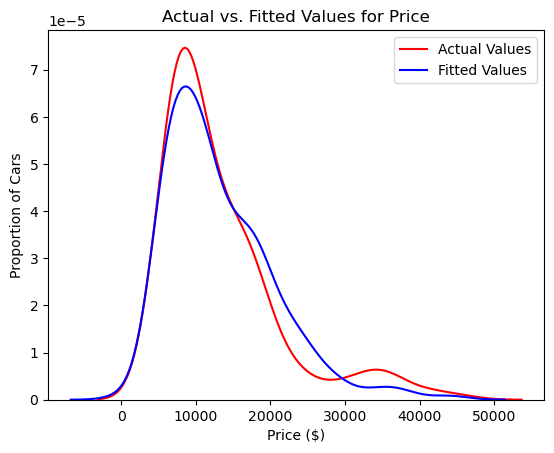

In [108]:

ax1=sns.distplot(df['price'], hist=False, color='r', label="Actual Values")
sns.distplot(Yhat2, hist=False, color='b', label="Fitted Values", ax=ax1)

mpl.title('Actual vs. Fitted Values for Price')
mpl.xlabel('Price ($)')
mpl.ylabel('Proportion of Cars')

mpl.legend()

It does appear that in our model for multiple linear regression (using the predictor variables:horsepower, curb-weight, engine-size and highway-mpg) has fitted values fairly close to the actual values.

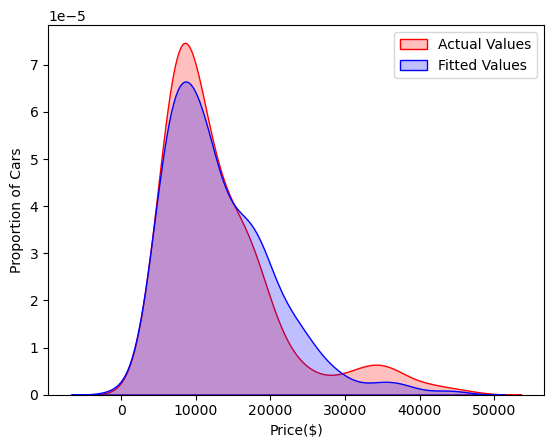

In [109]:
#Another example using kdeplot instead of distplot

sns.kdeplot(df['price'], color='r', shade=True, label='Actual Values')
  
sns.kdeplot(Yhat2, color='b', shade=True, label='Fitted Values')
  
mpl.xlabel('Price($)')
mpl.ylabel('Proportion of Cars')
mpl.legend()


Here we can see the overlap between the actual and fitted values (in purple) and visualize how close the fitted values are to the actual values from the dataset.

<h1><b>Polynomial Regression</h1></b>

In [110]:
def PlotPoly(model, IV, DV, name):
    new_x=np.linspace(15,55,100)
    new_y=model(new_x)
    mpl.plot(IV, DV, '.', new_x, new_y, '-')
    mpl.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = mpl.gca() #Get current axes
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = mpl.gcf() #Get current figure
    mpl.xlabel(name)
    mpl.ylabel('Price of Cars')

    mpl.show()
    mpl.close()

In [114]:
#Fit the polynomial
f=np.polyfit(df['highway-mpg'], df['price'], 3) #Cubic polynomial (3rd order)

#Display the polynomial function
p=np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


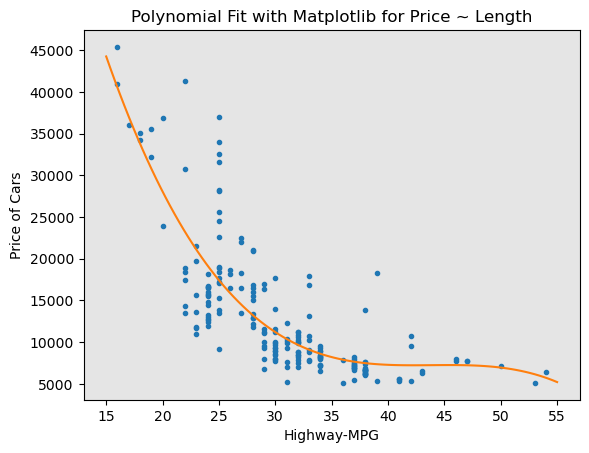

In [115]:
PlotPoly(p, df['highway-mpg'], df['price'], 'Highway-MPG')

Now we can see that this polynomial model has better performance compared to the linear model

In [126]:
from sklearn.preprocessing import PolynomialFeatures

Now lets perform a polynomial transformation on multiple features!

In [121]:
pr=PolynomialFeatures(degree=2) #Create PolynomialFeatures object
pr

PolynomialFeatures()

In [122]:
Z_pr=pr.fit_transform(Z)

In [124]:
Z.shape #Original Data

(201, 4)

In [125]:
Z_pr.shape #Transformed Data

(201, 15)

<h1><b>Data Pipelines</h1></b>
<p> Simplify data processing! </p>

In [127]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


#Create list of tuples to create Pipeline
Input=[('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2)), ('mode', LinearRegression())]


In [129]:
pipe=Pipeline(Input) #Input the list as an argument to the pipeline constructor
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('mode', LinearRegression())])

In [ ]:
#Convert data type Z to float
Z=Z.astype(float)

In [132]:
#Train the pipeline object
pipe.fit(Z, df['price'])

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('mode', LinearRegression())])

In [154]:
ypipe=pipe.predict(Z)
ypipe[0:5]              

array([13698.95609311, 13698.95609311, 19056.78572196, 10621.59764327,
       15519.32197778])

<h2><b> Example for Pipelines: </h2></b>
<p><b> Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y. </p></b>

In [136]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,df['price'])

ypipe=pipe.predict(Z)
ypipe[0:5]

array([13698.95609311, 13698.95609311, 19056.78572196, 10621.59764327,
       15519.32197778])

<h1><b> In-Sample Evaluation </h1></b>
<p> The numerical determination of how well the model fits the dataset. </p>
<p>Model accuracy is determined by: 
    <li>-R-squared(Coefficient of Determination)</li>
    <li>-Mean standard error (MSE)</li> </p>
 
<h2><b> Model 1: Simple Linear Regression </h2></b>

In [137]:
#Find the R-squared of highway-mpg and price
lm.fit(X,Y)
R_sq=lm.score(X,Y)
print('The R-squared is:', R_sq)

The R-squared is: 0.4965911884339175


This means that 49.66% of the variation of price is explained by this simple linear model (using highway-mpg).

In [147]:
#Predict the output (Yhat)
#Yhat=lm.predict(X)
print('The first 4 predicted values are:', Yhat[0:4] )

The first 4 predicted values are: [[16236.50464347]
 [16236.50464347]
 [17058.23802179]
 [13771.3045085 ]]


In [148]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(df['price'], Yhat)
print('The MSE of price vs. the predicted value is:', mse)

The MSE of price vs. the predicted value is: 31635042.944639895


<h2><b> Model 2: Multiple Linear Regression </h2></b>

In [149]:
lm.fit(Z, df['price'])
print('R-squared is:', lm.score(Z, df['price']))


R-squared is: 0.8094390422815301


This means that 80.94% of variation of price is explained by horsepower, curb-weight, engine-size and highway-mpg in this multiple linear regression model

In [146]:
#Calculate MSE
#Yhat2 is lm.predict(Z)
print('The MSE of price vs. the predicted value is:', mean_squared_error(df['price'], Yhat2))

The MSE of price vs. the predicted value is: 11975165.993303549


<h2><b> Model 3: Polynomial Regression </h2></b>

In [151]:
from sklearn.metrics import r2_score

#Find the R-squared value
r_sq_poly=r2_score(df['price'], p(df['highway-mpg']))
print('The R-squared value is:', r_sq_poly)

The R-squared value is: 0.674194666390652


This means that 67.42% of the variation of price is explained by this polynomial fit.

In [152]:
#Calculate the MSE
mse_poly=mean_squared_error(df['price'], p(df['highway-mpg']))
print('The MSE of price vs. the predicted value is:',mse_poly)

The MSE of price vs. the predicted value is: 20474146.426361218


Overall, the Multiple Linear Regression Model was the best model out of the three explored.
<p> For good fit, you want a model with a <b> high </b> R-squared value and a <b> low </b> MSE value </p>

## **Resources**

https://medium.com/@HalderNilimesh/understanding-residual-plots-in-linear-regression-models-a-comprehensive-guide-with-examples-2fb5a60daf26#:~:text=A%20residual%20plot%20is%20a%20graphical%20representation%20of,predicted%20values%20obtained%20from%20the%20linear%20regression%20model.

https://statsmethods.wordpress.com/2013/05/10/residual-plot/#:~:text=A%20residual%20plot%20is%20a%20graph%20used%20to,are%20equal%2C%20which%20is%20a%20condition%20for%20regression.

https://www.kaggle.com/code/fazilbtopal/model-development-and-evaluation-with-python

https://www.geeksforgeeks.org/kde-plot-visualization-with-pandas-and-seaborn/

https://www.geeksforgeeks.org/matplotlib-figure-figure-gca-in-python/



This Jupyter Notebook was created to take notes for a lab assignment from the IBM Data Science Certificate through Coursera. The module is credited to:Joseph Santarcangelo, Mahdi Noorian, Bahare Talayian, Eric Xiao, Steven Dong, Parizad and Hima Vasudevan.